<a href="https://colab.research.google.com/github/Koscee/pytorch-deep-learning-practice/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

Types:

| Problem type | What it is? | Example |
|---|---|---|
| Binary Classification | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| Multi-class Classification | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| Multi-label Classification | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |

## 1. Generate classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make a DataFrame of circle data
import pandas as pd

circles_df = pd.DataFrame({"X1": X[:, 0],
                           "X2": X[:, 1],
                           "Label": y})
circles_df

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


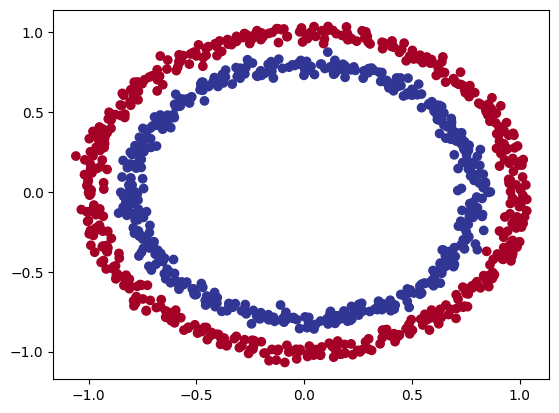

In [6]:
# Visualize sample dataset
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap="RdYlBu")

**Note:** The above sample data is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

## 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#  View the first sample's features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and its label y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and its label y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and its label y: 1
Shape for one sample of X: (2,) and its label y: ()


## 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch

torch.__version__

'2.1.0+cu121'

In [10]:
(type(X), X.dtype), (type(y), y.dtype)

((numpy.ndarray, dtype('float64')), (numpy.ndarray, dtype('int64')))

In [11]:
# Convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
(type(X), X.dtype), (type(y), y.dtype)

((torch.Tensor, torch.float32), (torch.Tensor, torch.float32))

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test data, 80% train data
                                                    random_state=42)

In [14]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Build a model to classify our blue and red dots.

Steps:
1. Setup device agnostic code (so the code can run on a GPU if there is one)
2. Construct a model (by inheriting the `nn.Module` class)
3. Define a loss function and optimizer
4. Create a training and test loop

In [16]:
from torch import nn

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
# 1. Create a model that inherits / extends nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers
      # takes in 2 features and scales up to 5 fetaures
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
      # takes in 5 features from previous layer and outputs a single feature (i.e the label y)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Define a forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [19]:
# Replicate model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3056,  0.4116],
                      [-0.2462,  0.3617],
                      [ 0.6488,  0.0687],
                      [-0.3180,  0.5751],
                      [ 0.2948,  0.6516]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4791,  0.2052, -0.0072, -0.5850, -0.5925], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0751, -0.2516,  0.0121,  0.2825, -0.3159]], device='cuda:0')),
             ('1.bias', tensor([0.0600], device='cuda:0'))])

In [21]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds.squeeze())}, Shape: {untrained_preds.squeeze().shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds.squeeze()[:10]}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
 tensor([-0.0842, -0.1651,  0.1093, -0.1390,  0.0802,  0.0310, -0.1735, -0.1276,
         0.1103, -0.1708], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Choosing a loss function or optimizer depends on the problem you are solving.

For example:
* Regression: MAE or MSE (mean absolute error or mean squared error) is used.
* Classification: binary cross entropy or categorical cross entropy (cross entropy) is used.

As a reminder, the loss function measures how wrong your predictions are.

List of common loss functions and optimizers:

| Loss function/Optimizer | Problem type | PyTorch Code |
|---|---|---|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | `torch.optim.SGD()` |
| Adam optimizer | Classification, regression, many others. | `torch.optim.Adam()` |
| Binary cross entropy loss | Binary classification | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss` |
| Cross entropy loss | Multi-class classification | `torch.nn.CrossEntropyLoss` |
| Mean absolute error (MAE) or L1 Loss | Regression | `torch.nn.L1Loss` |
| Mean squared error (MSE) or L2 Loss | Regression | `torch.nn.MSELoss` |


For this classification problem, `torch.nn.BCEWithLogitsLoss()` will be used.

More on binary cross entropy (BCE) -> https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [42]:
# Setup the loss function

# loss_fn = nn.BCELoss # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss

# BCEWithLogitsLoss has sigmoid activation function built-in.
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = Sigmoid layer + BCELoss

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [43]:
# Calculate accuracy : out of 100 samples, what % does our model get right?
# total_correct_guesses / total samples * 100
def accuracy_fn(y_true, y_pred):
  total_correct_guesses = torch.eq(y_true, y_pred).sum().item()
  accuracy = (total_correct_guesses/ len(y_pred)) * 100
  return accuracy


## 3. Train model

Build the training loop steps:
1. **Forward pass** - `model(X_train)`
2. **Calculate the loss** - `loss = loss_fn(y_pred, y_train)`
3. **Zero gradients** - `optimizer.zero_grad()`
4. **Perform backpropagation on the loss** - `loss.backward`
5. **Step the optimizer (gradient descent)** - `optimizer.step()`

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

**Logits** are model's raw outputs that havn't been passed through any activation function.

**Logits** can be converted into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Model's prediction probabilities can be converted to **prediction labels** by either rounding them or taking the `argmax()`.

In [44]:
# View first 5 outputs (raw outputs) of the forward pass on test data.
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0139],
        [-0.0350],
        [ 0.0224],
        [-0.0241],
        [-0.0081]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on the model's logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4790],
        [0.4588],
        [0.5273],
        [0.4653],
        [0.5200]], device='cuda:0')

**Decision boundary**

For the prediction probability values, a range-style rounding needs to be performed on them:
* `y_pred_probs` < 0.5,  y =  0 (class 0)
* `y_pred_probs` >= 0.5,  y = 1  (class 1)

In [33]:
# Note: don't round the raw logits above directly, raw logits need to pass through the activation function
# which returns the prediction probability that is been rounded.
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [45]:
# Find the predicted labels

# method 1
y_pred_labels_v0 = torch.round(y_pred_probs)

# method 2: in one line (logits -> pred probs -> pred labels)
y_pred_labels_v1 = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check y_pred_label v0 and v1 are equal
print(torch.eq(y_pred_labels_v0.squeeze(), y_pred_labels_v1.squeeze()))

# Get rid of extra dimension
y_pred_labels_v0.squeeze()

tensor([ True,  True,  True,  True, False], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_train_logits = model_0(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate train loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)

  train_loss = loss_fn(y_train_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                         y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_train_pred)

  # 3. Optimizeer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step (update parameters to reduce the gradient)
  optimizer.step()


  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_logits = model_0(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. Calculate the test loss / accuracy
    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=y_test_pred)

  # Print out details of the process
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}  | Train loss: {train_loss:.5f}, Train Acc: {train_accuracy:.2f}%  | Test loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}%")


Epoch: 0  | Train loss: 0.69347, Train Acc: 48.00%  | Test loss: 0.69239, Test Acc: 53.00%
Epoch: 10  | Train loss: 0.69340, Train Acc: 47.25%  | Test loss: 0.69254, Test Acc: 52.50%
Epoch: 20  | Train loss: 0.69333, Train Acc: 48.00%  | Test loss: 0.69268, Test Acc: 53.00%
Epoch: 30  | Train loss: 0.69328, Train Acc: 48.38%  | Test loss: 0.69282, Test Acc: 50.50%
Epoch: 40  | Train loss: 0.69324, Train Acc: 48.50%  | Test loss: 0.69295, Test Acc: 49.50%
Epoch: 50  | Train loss: 0.69320, Train Acc: 48.38%  | Test loss: 0.69307, Test Acc: 48.00%
Epoch: 60  | Train loss: 0.69317, Train Acc: 49.75%  | Test loss: 0.69318, Test Acc: 44.50%
Epoch: 70  | Train loss: 0.69314, Train Acc: 50.12%  | Test loss: 0.69329, Test Acc: 46.00%
Epoch: 80  | Train loss: 0.69311, Train Acc: 48.50%  | Test loss: 0.69339, Test Acc: 50.00%
Epoch: 90  | Train loss: 0.69309, Train Acc: 49.00%  | Test loss: 0.69348, Test Acc: 50.00%


## 4. Make predictions and evaluate the model

From the metrics, it looks like the model isn't learning anything.
To inspect this, the predictions needs to be visualized

Resource: https://madewithml.com/courses/foundations/neural-networks/

In [47]:
import requests
from pathlib import Path

file_name = "helper_functions.py"
raw_file_url = "https://raw.githubusercontent.com/Koscee/pytorch-deep-learning-practice/main/helper_functions.py"

# Download helper functions from github repo (if it does not exist)
if Path(file_name).is_file():
  print(f"{file_name} already exists, skipping download")
else:
  print(f"Downloading {file_name}")
  request = requests.get(raw_file_url) # TODO: handle exception
  with open(file_name, "wb") as f:
    f.write(request.content)


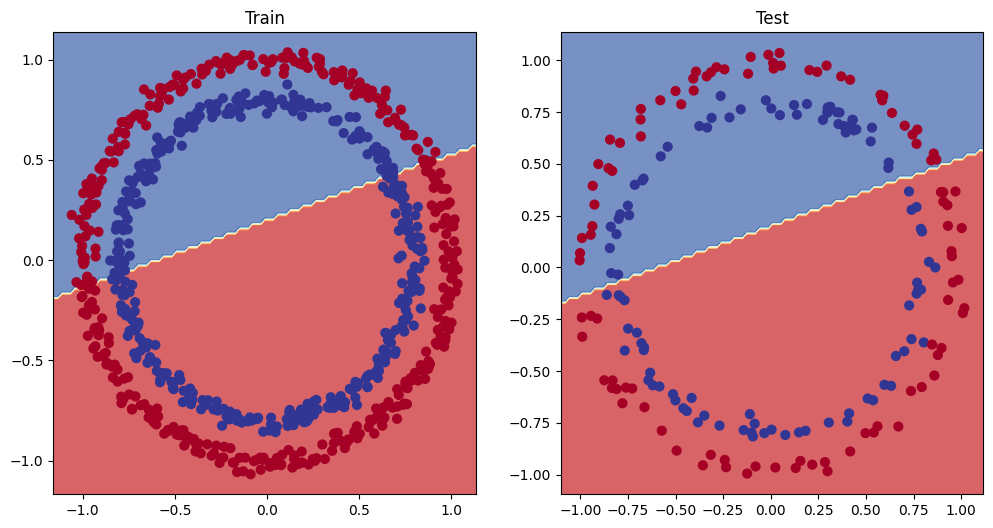

In [48]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)